In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import OpenBlender
import json

In [38]:
token = '6123f6a395162938229d2bdekLP7S8uuBnaCTFP6Bq6ZZihkN61ovd'

In [39]:
action = 'API_getObservationsFromDataset'
parameters = { 
    'token' : token,
    'id_dataset' : '5d4c3af79516290b01c83f51',
    'date_filter':{"start_date" : "2020-01-01",
                   "end_date" : "2020-08-29"} 
}
df = pd.read_json(json.dumps(OpenBlender.call(action, parameters)['sample']), convert_dates=False, convert_axes=False).sort_values('timestamp', ascending=False)
df.reset_index(drop=True, inplace=True)
df['date'] = [OpenBlender.unixToDate(ts, timezone = 'GMT') for ts in df.timestamp]
df = df.drop('timestamp', axis = 1)

Task ID: '6123fdd60895fafb4a9d8d4b'.
Total estimated consumption: 500.02 processing units.
Task confirmed. Starting download..
100.0 % completed.


In [40]:
df


,volume,price,high,low,open,change,date
0,2.02K,11545.0,11545.0,11343.0,11343.0,1.78%,28-08-2020 17:00:00
1,4.81K,11343.0,11471.1,11254.0,11471.1,-1.12%,27-08-2020 17:00:00
2,2.48K,11471.0,11482.0,11316.0,11341.0,1.15%,26-08-2020 17:00:00
3,6.16K,11341.0,11768.0,11200.0,11768.0,-3.63%,25-08-2020 17:00:00
4,1.93K,11663.0,11692.6,11551.0,11685.0,-0.19%,23-08-2020 17:00:00
...,...,...,...,...,...,...,...
231,4.45K,7364.6,7509.9,7315.8,7370.3,-0.07%,05-01-2020 17:00:00
232,4.27K,7369.8,7422.0,7297.7,7371.8,0.03%,04-01-2020 17:00:00
233,6.68K,7367.5,7437.6,6909.3,6989.4,5.41%,03-01-2020 17:00:00
234,4.85K,6989.4,7225.2,6963.0,7212.7,-3.10%,02-01-2020 17:00:00


In [41]:
df['log_diff'] = np.log(df['price']) - np.log(df['open'])

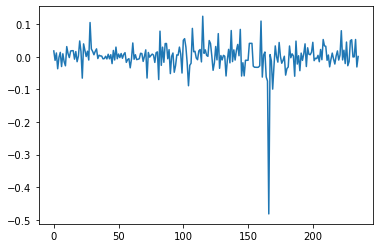

In [42]:
plt.plot(df['log_diff'])

In [43]:
df['target'] = [1 if log_diff > 0 else 0 for log_diff in df['log_diff']]

In [44]:
Counter(df['target'])

Counter({1: 127, 0: 109})

In [48]:
format = '%d-%m-%Y %H:%M:%S'
timezone = 'GMT'
df['timestamp'] = OpenBlender.dateToUnix(df['date'], 
                                           date_format = format, 
                                           timezone = timezone)
df = df[['date', 'timestamp', 'price', 'target']]
df.head()

,date,timestamp,price,target
0,28-08-2020 17:00:00,1.598634e+09,11545.0,1
1,27-08-2020 17:00:00,1.598548e+09,11343.0,0
2,26-08-2020 17:00:00,1.598461e+09,11471.0,1
3,25-08-2020 17:00:00,1.598375e+09,11341.0,0
4,23-08-2020 17:00:00,1.598202e+09,11663.0,0


In [49]:
search_keyword = 'bitcoin'
df = df.sort_values('timestamp').reset_index(drop = True)
print('From : ' + OpenBlender.unixToDate(min(df.timestamp)))
print('Until: ' + OpenBlender.unixToDate(max(df.timestamp)))
OpenBlender.searchTimeBlends(token,
                             df.timestamp,
                             search_keyword)

From : 01-01-2020 17:00:00
Until: 28-08-2020 17:00:00


[{'name': 'Bitcoins Cash Historical data',
  'url': 'https://www.openblender.io/#/dataset/explore/5d9f899b951629329a748593',
  'id_dataset': '5d9f899b951629329a748593',
  'features': ['close',
   'high',
   'low',
   'market_cap',
   'open',
   'timestamp',
   'volume'],
  'num_observations': 1457,
  'intersection': 100,
  'description': 'Daily prices and volumes for the digital currency BitcoinsCash.'},
 {'name': 'Bitcoin SV Price',
  'url': 'https://www.openblender.io/#/dataset/explore/5db7a7c99516294f3f6c2faf',
  'id_dataset': '5db7a7c99516294f3f6c2faf',
  'features': ['change',
   'high',
   'low',
   'open',
   'price',
   'timestamp',
   'volume'],
  'num_observations': 588,
  'intersection': 100,
  'description': 'Daily Price of Bitcoin SV'},
 {'name': 'Bitcoin Gold Price',
  'url': 'https://www.openblender.io/#/dataset/explore/5db7aa0b9516294f3f6c30ca',
  'id_dataset': '5db7aa0b9516294f3f6c30ca',
  'features': ['change',
   'high',
   'low',
   'open',
   'price',
   'timestamp

In [50]:
blend_source = {
                'id_dataset':'5ea2039095162936337156c9',
                'feature' : 'text'
            }

# Now, let's 'timeBlend' it to our dataset
df_blend = OpenBlender.timeBlend( token = token,
                                  anchor_ts = df.timestamp,
                                  blend_source = blend_source,
                                  blend_type = 'agg_in_intervals',
                                  interval_size = 60 * 60 * 24,
                                  direction = 'time_prior',
                                  interval_output = 'list',
                                  missing_values = 'raw')
df = pd.concat([df, df_blend.loc[:, df_blend.columns != 'timestamp']], axis = 1)
df.head()

Task ID: '6123fe4a0895fafb4a9d8d4c'.
Total estimated consumption: 1555.2 processing units.
Task confirmed. Starting download..
100%


,date,timestamp,price,target,BITCOIN_NE.text_COUNT_last1days,BITCOIN_NE.text_last1days
0,01-01-2020 17:00:00,1.577898e+09,7212.7,1,3,[etoro ceo yoni assia on reaching 12 million u...
1,02-01-2020 17:00:00,1.577984e+09,6989.4,0,7,[government confirms crypto profits not taxabl...
2,03-01-2020 17:00:00,1.578071e+09,7367.5,1,8,[ticker tool uses the bch blockchain to provid...
3,04-01-2020 17:00:00,1.578157e+09,7369.8,0,6,[crypto fundraising is changing again in 2020 ...
4,05-01-2020 17:00:00,1.578244e+09,7364.6,0,5,[subhash chandra garg on the future of crypto ...


In [123]:
df1 = pd.read_csv('BTC_2020_2021_15m.csv',nrows=5000)

In [124]:
df1['log_diff'] = np.log(df1['Close']) - np.log(df1['Open'])
df1['target'] = [1 if log_diff > 0 else 0 for log_diff in df1['log_diff']]

In [125]:
df1

,Date,Open,Close,High,Low,Volume,log_diff,target
0,2019-12-31 17:00:00,7223.3,7220.400000,7223.300000,7215.000000,19.453317,-0.000402,0
1,2019-12-31 17:15:00,7217.5,7211.000000,7219.900000,7210.908002,9.112530,-0.000901,0
2,2019-12-31 17:30:00,7211.0,7183.000000,7211.000000,7178.000000,130.633798,-0.003891,0
3,2019-12-31 17:45:00,7181.0,7174.000000,7182.500000,7171.000000,48.137639,-0.000975,0
4,2019-12-31 18:00:00,7173.8,7161.300000,7176.190088,7161.300000,70.709876,-0.001744,0
...,...,...,...,...,...,...,...,...
4995,2020-02-21 22:15:00,9652.8,9652.600000,9652.800000,9643.100000,22.429771,-0.000021,0
4996,2020-02-21 22:30:00,9652.5,9641.600000,9652.600000,9641.600000,29.362746,-0.001130,0
4997,2020-02-21 22:45:00,9641.7,9652.600000,9652.600000,9633.600000,31.945933,0.001130,1
4998,2020-02-21 23:00:00,9652.6,9672.848495,9673.000000,9649.546905,1365.868909,0.002096,1


In [126]:
format = '%Y-%m-%d %H:%M:%S'
timezone = 'GMT'
df1['timestamp'] = OpenBlender.dateToUnix(df1['Date'], 
                                           date_format = format, 
                                           timezone = timezone)
df1 = df1[['Date', 'timestamp', 'Close', 'target']]
df1.head()

,Date,timestamp,Close,target
0,2019-12-31 17:00:00,1.577812e+09,7220.4,0
1,2019-12-31 17:15:00,1.577812e+09,7211.0,0
2,2019-12-31 17:30:00,1.577813e+09,7183.0,0
3,2019-12-31 17:45:00,1.577814e+09,7174.0,0
4,2019-12-31 18:00:00,1.577815e+09,7161.3,0


In [127]:
search_keyword = 'bitcoin'
df1 = df1.sort_values('timestamp').reset_index(drop = True)
print('From : ' + OpenBlender.unixToDate(min(df1.timestamp)))
print('Until: ' + OpenBlender.unixToDate(max(df1.timestamp)))
OpenBlender.searchTimeBlends(token,
                             df.timestamp,
                             search_keyword)

From : 31-12-2019 17:00:00
Until: 21-02-2020 23:15:00


[{'name': 'Bitcoins Cash Historical data',
  'url': 'https://www.openblender.io/#/dataset/explore/5d9f899b951629329a748593',
  'id_dataset': '5d9f899b951629329a748593',
  'features': ['close',
   'high',
   'low',
   'market_cap',
   'open',
   'timestamp',
   'volume'],
  'num_observations': 1457,
  'intersection': 100,
  'description': 'Daily prices and volumes for the digital currency BitcoinsCash.'},
 {'name': 'Bitcoin SV Price',
  'url': 'https://www.openblender.io/#/dataset/explore/5db7a7c99516294f3f6c2faf',
  'id_dataset': '5db7a7c99516294f3f6c2faf',
  'features': ['change',
   'high',
   'low',
   'open',
   'price',
   'timestamp',
   'volume'],
  'num_observations': 588,
  'intersection': 100,
  'description': 'Daily Price of Bitcoin SV'},
 {'name': 'Bitcoin Gold Price',
  'url': 'https://www.openblender.io/#/dataset/explore/5db7aa0b9516294f3f6c30ca',
  'id_dataset': '5db7aa0b9516294f3f6c30ca',
  'features': ['change',
   'high',
   'low',
   'open',
   'price',
   'timestamp

In [128]:
df1

,Date,timestamp,Close,target
0,2019-12-31 17:00:00,1.577812e+09,7220.400000,0
1,2019-12-31 17:15:00,1.577812e+09,7211.000000,0
2,2019-12-31 17:30:00,1.577813e+09,7183.000000,0
3,2019-12-31 17:45:00,1.577814e+09,7174.000000,0
4,2019-12-31 18:00:00,1.577815e+09,7161.300000,0
...,...,...,...,...
4995,2020-02-21 22:15:00,1.582323e+09,9652.600000,0
4996,2020-02-21 22:30:00,1.582324e+09,9641.600000,0
4997,2020-02-21 22:45:00,1.582325e+09,9652.600000,1
4998,2020-02-21 23:00:00,1.582326e+09,9672.848495,1


In [129]:
blend_source = {
                'id_dataset':'5ea2039095162936337156c9',
                'feature' : 'text'
            }

# Now, let's 'timeBlend' it to our dataset
df_blend = OpenBlender.timeBlend( token = token,
                                  anchor_ts = df1.timestamp,
                                  blend_source = blend_source,
                                  blend_type = 'agg_in_intervals',
                                  interval_size = 60 * 15,
                                  direction = 'time_prior',
                                  interval_output = 'list',
                                  missing_values = 'raw')
df1 = pd.concat([df1, df_blend.loc[:, df_blend.columns != 'timestamp']], axis = 1)
df1.head()

Task ID: '612416580895fafb4a9d8d4c'.
Total estimated consumption: 16800.0 processing units.
Task confirmed. Starting download..
20.0%
40.0%
60.0%
80.0%
100%


,Date,timestamp,Close,target,BITCOIN_NE.text_last15min,BITCOIN_NE.text_COUNT_last15min
0,2019-12-31 17:00:00,1.577812e+09,7220.4,0,[],0
1,2019-12-31 17:15:00,1.577812e+09,7211.0,0,[],0
2,2019-12-31 17:30:00,1.577813e+09,7183.0,0,[],0
3,2019-12-31 17:45:00,1.577814e+09,7174.0,0,[],0
4,2019-12-31 18:00:00,1.577815e+09,7161.3,0,[],0


In [130]:
df1.to_csv('test_test_news2.csv',index=False)

In [98]:
positive_filter = {'name' : 'positive', 
                   'match_ngrams': ['positive', 'buy', 
                                    'bull', 'boost']}
blend_source = {
                'id_dataset':'5ea2039095162936337156c9',
                'feature' : 'text',
                'filter_text' : positive_filter
            }
df_blend = OpenBlender.timeBlend( token = token,
                                  anchor_ts = df.timestamp,
                                  blend_source = blend_source,
                                  blend_type = 'agg_in_intervals',
                                  interval_size = 60 * 15,
                                  direction = 'time_prior',
                                  interval_output = 'list',
                                  missing_values = 'raw')
df = pd.concat([df, df_blend.loc[:, df_blend.columns != 'timestamp']], axis = 1)

# And now the negatives
negative_filter = {'name' : 'negative', 
                   'match_ngrams': ['negative', 'loss', 'drop', 'plummet', 'sell', 'fundraising']}
blend_source = {
                'id_dataset':'5ea2039095162936337156c9',
                'feature' : 'text',
                'filter_text' : negative_filter
            }
df_blend = OpenBlender.timeBlend( token = token,
                                  anchor_ts = df.timestamp,
                                  blend_source = blend_source,
                                  blend_type = 'agg_in_intervals', #closest_observation
                                  interval_size = 60 * 15,
                                  direction = 'time_prior',
                                  interval_output = 'list',
                                  missing_values = 'raw')
df = pd.concat([df, df_blend.loc[:, df_blend.columns != 'timestamp']], axis = 1)

Task ID: '612411d60895fafb4a9d8d4c'.
Total estimated consumption: 1555.2 processing units.
Task confirmed. Starting download..
100%
Task ID: '612411db0895fafb4a9d8d4c'.
Total estimated consumption: 1555.2 processing units.
Task confirmed. Starting download..
100%


In [6]:
tweets = pd.read_csv('Bitcoin_tweets.csv')

C:\Users\User\miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [37]:
tweets = tweets[tweets['user_followers'] >= 100000]
print(tweets.keys())

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')


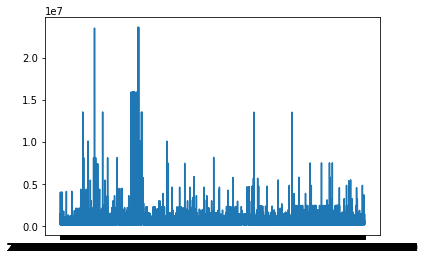

In [38]:
plt.plot(tweets['date'],tweets['user_followers'])

In [46]:
tweets['is_bitcoin'] == tweets['hastags'].apply(lambda x: 1 if ('BTC' in x or 'Bitcoin' in x) else 0)

KeyError: 'is_bitcoin'